<img src="https://tradingcomdados.com/images/logotipo/logotipo-trading-com-dados.svg" width="300" align="left"/>

------
# **Backtesting definitivo RSI**
------

# 1. Bibliotecas

In [ ]:
%pip install --upgrade --no-cache-dir git+https://github.com/StreamAlpha/tvdatafeed.git

In [1]:
# Análise e manipulação de dados
import numpy as np
import pandas as pd

# Dados séries temporais
from datetime import datetime, timedelta
import pytz

# Fonte de dados
from tvDatafeed import TvDatafeed, Interval
import MetaTrader5 as mt5

# Indicadores e backtesting
import ta
import vectorbt as vbt

# Bibliotecas gráficas
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 2.Obtenção de dados

## 2.1. Cotações OHLC - TradingView - Week a 5min

In [2]:
lista_tickers = ['WDO1!', 'WIN1!', 'ABEV3', 'ALPA4', 'ALSO3', 'ARZZ3', 'ASAI3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4',
                'BBSE3', 'BEEF3', 'BPAC11', 'BPAN4', 'BRAP4', 'BRFS3', 'BRKM5', 'CASH3', 'CCRO3', 'CIEL3', 'CMIG4', 'CMIN3',
                'COGN3', 'CPFE3', 'CPLE6', 'CRFB3', 'CSAN3', 'CSNA3', 'CVCB3', 'CYRE3', 'DXCO3', 'ECOR3', 'EGIE3', 'ELET3',
                'ELET6', 'EMBR3', 'ENBR3', 'ENEV3', 'ENGI11', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GOAU4', 'GOLL4', 'HAPV3',
                'HYPE3', 'IGTI11', 'ITSA4', 'ITUB4', 'JBSS3', 'KLBN11', 'LREN3', 'LWSA3', 'MGLU3', 'MRFG3', 'MRVE3', 'MULT3',
                'NTCO3', 'PCAR3', 'PETR3', 'PETR4', 'PETZ3', 'PRIO3', 'QUAL3', 'RADL3', 'RAIL3', 'RAIZ4', 'RDOR3', 'RENT3',
                'RRRP3', 'SANB11', 'SBSP3', 'SLCE3', 'SMTO3', 'SOMA3', 'SUZB3', 'TAEE11', 'TIMS3', 'TOTS3', 'UGPA3', 'USIM5',
                'VALE3', 'VBBR3', 'VIIA3', 'VIVT3', 'WEGE3', 'YDUQ3']

In [3]:
timeframes = [Interval.in_weekly, Interval.in_daily, Interval.in_1_hour,
                Interval.in_15_minute, Interval.in_5_minute]

In [4]:
cotacoes_tv_all = []

for ticker in lista_tickers:

    cotacoes_tv_ativo = []

    for timeframe in timeframes:

        cotacoes_tv_ativo_timef = TvDatafeed().get_hist(symbol=ticker, exchange='BMFBOVESPA', interval=timeframe, n_bars=10000)
        cotacoes_tv_ativo_timef['symbol'] = cotacoes_tv_ativo_timef['symbol'].str.replace('BMFBOVESPA:', '')
        cotacoes_tv_ativo_timef['timeframe'] = str(timeframe)[12:]

        cotacoes_tv_ativo.append(cotacoes_tv_ativo_timef)
    
    cotacoes_tv_all.append(cotacoes_tv_ativo)

you are using nologin method, data you access may be limited


In [5]:
list(enumerate(lista_tickers))[0:5]

[(0, 'WDO1!'), (1, 'WIN1!'), (2, 'ABEV3'), (3, 'ALPA4'), (4, 'ALSO3')]

In [6]:
timeframes_str = []
for i in timeframes:
    timeframes_str.append(str(i)[12:])
    
list(enumerate(timeframes_str))

[(0, 'weekly'), (1, 'daily'), (2, '1_hour'), (3, '15_minute'), (4, '5_minute')]

In [7]:
cotacoes_tv_all[1][3]

,symbol,open,high,low,close,volume,timeframe
datetime,,,,,,,
2022-09-01 09:00:00,WIN1!,111250.0,111415.0,110825.0,111185.0,618107.0,15_minute
2022-09-01 09:15:00,WIN1!,111185.0,111505.0,111150.0,111350.0,359003.0,15_minute
2022-09-01 09:30:00,WIN1!,111350.0,111495.0,111210.0,111245.0,485551.0,15_minute
2022-09-01 09:45:00,WIN1!,111245.0,111390.0,111020.0,111270.0,523212.0,15_minute
2022-09-01 10:00:00,WIN1!,111270.0,111485.0,110935.0,111175.0,971894.0,15_minute
...,...,...,...,...,...,...,...
2023-03-30 09:00:00,WIN1!,103680.0,104030.0,103570.0,103730.0,476896.0,15_minute
2023-03-30 09:15:00,WIN1!,103735.0,103950.0,103560.0,103790.0,404150.0,15_minute
2023-03-30 09:30:00,WIN1!,103795.0,104200.0,103745.0,103985.0,616797.0,15_minute


## 2.2. Cotações OHLC - TradingView - Monthly a Diario

In [3]:
lista_tickers = ['WDO1!', 'WIN1!', 'ABEV3', 'ALPA4', 'ALSO3', 'ARZZ3', 'ASAI3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4',
                'BBSE3', 'BEEF3', 'BPAC11', 'BPAN4', 'BRAP4', 'BRFS3', 'BRKM5', 'CASH3', 'CCRO3', 'CIEL3', 'CMIG4', 'CMIN3',
                'COGN3', 'CPFE3', 'CPLE6', 'CRFB3', 'CSAN3', 'CSNA3', 'CVCB3', 'CYRE3', 'DXCO3', 'ECOR3', 'EGIE3', 'ELET3',
                'ELET6', 'EMBR3', 'ENBR3', 'ENEV3', 'ENGI11', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GOAU4', 'GOLL4', 'HAPV3',
                'HYPE3', 'IGTI11', 'ITSA4', 'ITUB4', 'JBSS3', 'KLBN11', 'LREN3', 'LWSA3', 'MGLU3', 'MRFG3', 'MRVE3', 'MULT3',
                'NTCO3', 'PCAR3', 'PETR3', 'PETR4', 'PETZ3', 'PRIO3', 'QUAL3', 'RADL3', 'RAIL3', 'RAIZ4', 'RDOR3', 'RENT3',
                'RRRP3', 'SANB11', 'SBSP3', 'SLCE3', 'SMTO3', 'SOMA3', 'SUZB3', 'TAEE11', 'TIMS3', 'TOTS3', 'UGPA3', 'USIM5',
                'VALE3', 'VBBR3', 'VIIA3', 'VIVT3', 'WEGE3', 'YDUQ3']

In [4]:
timeframes = [Interval.in_monthly, Interval.in_weekly, Interval.in_daily]

In [5]:
cotacoes_tv_all = []

for ticker in lista_tickers:

    cotacoes_tv_ativo = []

    for timeframe in timeframes:

        cotacoes_tv_ativo_timef = TvDatafeed().get_hist(symbol=ticker, exchange='BMFBOVESPA', interval=timeframe, n_bars=10000)
        cotacoes_tv_ativo_timef['symbol'] = cotacoes_tv_ativo_timef['symbol'].str.replace('BMFBOVESPA:', '')
        cotacoes_tv_ativo_timef['timeframe'] = str(timeframe)[12:]

        cotacoes_tv_ativo.append(cotacoes_tv_ativo_timef)
    
    cotacoes_tv_all.append(cotacoes_tv_ativo)

you are using nologin method, data you access may be limited


In [5]:
#list(enumerate(lista_tickers))

## 2.3. Cotações OHLC - MetaTrader

In [ ]:
mt5.initialize()

In [ ]:
lista_tickers = ['WDO$', 'WIN$', 'ABEV3', 'ALPA4', 'ALSO3', 'ARZZ3', 'ASAI3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4',
                'BBSE3', 'BEEF3', 'BPAC11', 'BPAN4', 'BRAP4', 'BRFS3', 'BRKM5', 'CASH3', 'CCRO3', 'CIEL3', 'CMIG4', 'CMIN3',
                'COGN3', 'CPFE3', 'CPLE6', 'CRFB3', 'CSAN3', 'CSNA3', 'CVCB3', 'CYRE3', 'DXCO3', 'ECOR3', 'EGIE3', 'ELET3',
                'ELET6', 'EMBR3', 'ENBR3', 'ENEV3', 'ENGI11', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GOAU4', 'GOLL4', 'HAPV3',
                'HYPE3', 'IGTI11', 'ITSA4', 'ITUB4', 'JBSS3', 'KLBN11', 'LREN3', 'LWSA3', 'MGLU3', 'MRFG3', 'MRVE3', 'MULT3',
                'NTCO3', 'PCAR3', 'PETR3', 'PETR4', 'PETZ3', 'PRIO3', 'QUAL3', 'RADL3', 'RAIL3', 'RAIZ4', 'RDOR3', 'RENT3',
                'RRRP3', 'SANB11', 'SBSP3', 'SLCE3', 'SMTO3', 'SOMA3', 'SUZB3', 'TAEE11', 'TIMS3', 'TOTS3', 'UGPA3', 'USIM5',
                'VALE3', 'VBBR3', 'VIIA3', 'VIVT3', 'WEGE3', 'YDUQ3']

In [ ]:
for i in lista_tickers:
    selected=mt5.symbol_select(i, True)
    if not selected:
        print(i,"não localizado")
timeframes = [32769, 16408, 16385, 15, 5]
timezone = pytz.timezone("America/Sao_Paulo")
data_inicio = datetime(2013, 1, 1)
data_fim = datetime(2022, 12, 31)
data_inicio
timezone = pytz.timezone("America/Sao_Paulo")
data_inicio = datetime.now() - timedelta(days=10000)
data_fim = datetime.now()

cotacoes_mt5_all = []

for ticker in lista_tickers:

    cotacoes_mt5_ativo = []

    for timeframe in timeframes:

        cotacoes_mt5_ticker = mt5.copy_rates_range(ticker, timeframe, data_inicio, data_fim)
        cotacoes_mt5_ticker = pd.DataFrame(cotacoes_mt5_ticker)
        cotacoes_mt5_ticker['ticker'] = str(ticker)

        if timeframe==32769:
            cotacoes_mt5_ticker['timeframe'] = '1W'
        elif timeframe==16408:
            cotacoes_mt5_ticker['timeframe'] = '1D'
        elif timeframe==16385:
            cotacoes_mt5_ticker['timeframe'] = '1H'
        else:
            cotacoes_mt5_ticker['timeframe'] = str(timeframe)+'M'
        
        cotacoes_mt5_ticker.index = pd.to_datetime(cotacoes_mt5_ticker['time'], unit='s')
        cotacoes_mt5_ticker = cotacoes_mt5_ticker.drop('time', axis=1)
        cotacoes_mt5_ativo.append(cotacoes_mt5_ticker)
    
    cotacoes_mt5_all.append(cotacoes_mt5_ativo)
list(enumerate(lista_tickers))[0:5]
timeframes_str = ['1W', '1D', '1H', '15M', '5M']
list(enumerate(timeframes_str))
cotacoes_mt5_all[2][0]

## 2.4. Cálculo indicadores

In [17]:
dados_ohlc = cotacoes_tv_all.copy()

In [18]:
periodo_indicadores = 14
smooth_window = 3

<AxesSubplot:xlabel='datetime'>

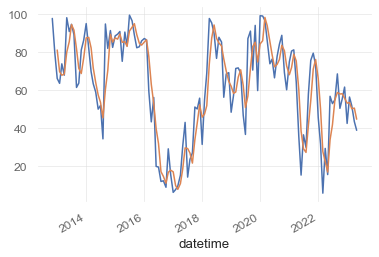

In [13]:
ta.momentum.StochasticOscillator(df.high, df.low, df.close, window=periodo_indicadores, smooth_window=3).stoch().plot()
ta.momentum.StochasticOscillator(df.high, df.low, df.close, window=periodo_indicadores, smooth_window=3).stoch_signal().plot()

In [26]:
for i in range(len(dados_ohlc)):
    for j in range(len(dados_ohlc[i])):
        dados_ohlc[i][j]['Stoch'] = ta.momentum.StochasticOscillator(dados_ohlc[i][j].high, dados_ohlc[i][j].low, dados_ohlc[i][j].close, window=periodo_indicadores, smooth_window=3).stoch()

# 3. Backtesting

In [27]:
for i in range(len(dados_ohlc)):

    for j in range(len(dados_ohlc[i])):

        dados_ohlc[i][j]['entrada'] = dados_ohlc[i][j]['Stoch'].vbt.crossed_above(15)
        dados_ohlc[i][j]['saida'] = dados_ohlc[i][j]['Stoch'].vbt.crossed_above(85)
        #dados_ohlc[i][j]['saida'] = dados_ohlc[i][j]['close'].vbt.crossed_above(dados_ohlc[i][j]['Bol_sup'])
        #dados_ohlc[i][j]['short_entrada'] = dados_ohlc[i][j]['close'].vbt.crossed_below(dados_ohlc[i][j]['Bol_sup'])
        #dados_ohlc[i][j]['short_saida'] = dados_ohlc[i][j]['close'].vbt.crossed_below(dados_ohlc[i][j]['Bol_media'])
        #dados_ohlc[i][j]['short_saida'] = dados_ohlc[i][j]['close'].vbt.crossed_below(dados_ohlc[i][j]['Bol_inf'])

In [28]:
ls_backtests_all = []

for i in range(len(dados_ohlc)):

    ls_backtests_ativo = []

    for j in range(len(dados_ohlc[i])):

        backtest_ativo = vbt.Portfolio.from_signals(dados_ohlc[i][j].close, entries=dados_ohlc[i][j].entrada, exits=dados_ohlc[i][j].saida,
                                                    #short_entries=dados_ohlc[i][j].short_entrada, short_exits=dados_ohlc[i][j].short_saida,
                                                    fees=0.00005,
                                                    size_type='Value', size=1,
                                                    )
        ls_backtests_ativo.append(backtest_ativo)

    ls_backtests_all.append(ls_backtests_ativo)

In [29]:
ls_ativos = []
ls_timeframes = []
ls_retorno = []
ls_n_trades = []
ls_annualized_return = []
ls_min_pnl = []


for i in range(len(ls_backtests_all)):

    for j in range(len(ls_backtests_ativo)):

        ls_ativos.append(i)
        ls_timeframes.append(j)
        
        ls_n_trades.append(ls_backtests_all[i][j].trades.count())

        ls_annualized_return = []

        lista_pnl = list(ls_backtests_all[i][j].trades.pnl.values)
        cash_init = [100]
        if lista_pnl == []:
            ls_min_pnl.append(1)
        else:
            ls_min_pnl.append(min(lista_pnl))
        for index,pnl in enumerate(lista_pnl):
            if pnl<=-1:
                pnl=0
                cash_init.append(cash_init[index]*pnl)
            else:
                cash_init.append(cash_init[index]*(1+pnl))
        if min(cash_init)==0:
            ls_retorno.append(0)
        else:
            ls_retorno.append(cash_init[-1])

In [30]:
from datetime import datetime as dt
import time

def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = dt(year=year, month=1, day=1)
    startOfNextYear = dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction

In [31]:
ls_ativos = []
ls_timeframes = []
ls_data_init = []
ls_year_init = []
ls_n_candles = []

for i in range(len(dados_ohlc)):

    for j in range(len(dados_ohlc[i])):

        ls_ativos.append(i)
        ls_timeframes.append(j)
        ls_data_init.append(dados_ohlc[i][j].index[0])
        ls_year_init.append(toYearFraction(dados_ohlc[i][j].index[0]))
        ls_n_candles.append(len(dados_ohlc[i][j]))

df_result_01 = pd.DataFrame([ls_ativos, ls_timeframes, ls_retorno, ls_n_trades, ls_min_pnl, ls_data_init, ls_year_init, ls_n_candles], \
                            index=['Ativo', 'Timeframe', 'Cash_final', 'N_trades', 'Min_PnL', 'Data_init', 'Ano_init','N_candles']).transpose()
df_result_01['Tempo_em_anos'] = toYearFraction(dt.now()) - df_result_01.Ano_init
df_result_01['Retorno_annualizado']  = (df_result_01.Cash_final/100)**(1/df_result_01.Tempo_em_anos) - 1
df_result_01 = df_result_01[df_result_01.N_trades>0]


result_final = pd.pivot_table(df_result_01, values="Retorno_annualizado", index=["Ativo"], columns=["Timeframe"], aggfunc='mean')
result_final = round(result_final*100,1)
result_final.index = lista_tickers

timeframes_reduzido = [str(i)[12:] for i in timeframes]
result_final.columns = timeframes_reduzido

In [32]:
result_final[:15].style.format('{:.2f}', na_rep="").applymap(lambda x: "font-weight: ; color: white; background-color : #CD0000" if x < -25 \
                                                        else ( "font-weight: ; color: black; background-color : #FF6666" if x <0 \
                                                              else ("font-weight: ; color: black; background-color : #C1FFC1" if x <10 \
                                                                  else ("font-weight: ; color: black; background-color : #43CD80" if x <20 \
                                                                        else ("font-weight: ; color: white; background-color : forestgreen" if x <100 \
                                                                              else ("font-weight: ; color: black; background-color : lightgray"))))))

,monthly,weekly,daily
WDO1!,0.20,2.80,2.40
WIN1!,4.00,0.80,0.20
ABEV3,5.10,2.20,3.50
ALPA4,6.60,-3.90,4.10
ALSO3,1.50,1.60,1.00
ARZZ3,4.30,6.50,9.40
ASAI3,,-21.70,-16.60
AZUL4,5.10,-13.50,-3.20
B3SA3,11.30,3.80,8.00
BBAS3,1.70,13.70,7.20


In [33]:
result_final[15:30].style.format('{:.2f}', na_rep="").applymap(lambda x: "font-weight: ; color: white; background-color : #CD0000" if x < -25 \
                                                        else ( "font-weight: ; color: black; background-color : #FF6666" if x <0 \
                                                              else ("font-weight: ; color: black; background-color : #C1FFC1" if x <10 \
                                                                  else ("font-weight: ; color: black; background-color : #43CD80" if x <20 \
                                                                        else ("font-weight: ; color: white; background-color : forestgreen" if x <100 \
                                                                              else ("font-weight: ; color: black; background-color : lightgray"))))))

,monthly,weekly,daily
BPAN4,20.50,-10.90,-12.10
BRAP4,-2.00,-2.60,-6.70
BRFS3,-1.60,-1.80,0.60
BRKM5,2.60,-1.60,-4.90
CASH3,,-56.30,-27.20
CCRO3,3.60,-0.60,15.60
CIEL3,-8.20,-0.50,-2.30
CMIG4,6.00,11.80,9.70
CMIN3,9.80,-12.50,-0.50
COGN3,9.00,3.10,-7.80


In [34]:
result_final[30:45].style.format('{:.2f}', na_rep="").applymap(lambda x: "font-weight: ; color: white; background-color : #CD0000" if x < -25 \
                                                        else ( "font-weight: ; color: black; background-color : #FF6666" if x <0 \
                                                              else ("font-weight: ; color: black; background-color : #C1FFC1" if x <10 \
                                                                  else ("font-weight: ; color: black; background-color : #43CD80" if x <20 \
                                                                        else ("font-weight: ; color: white; background-color : forestgreen" if x <100 \
                                                                              else ("font-weight: ; color: black; background-color : lightgray"))))))

,monthly,weekly,daily
CVCB3,-12.80,-16.90,-15.40
CYRE3,6.60,8.20,7.40
DXCO3,-1.90,-1.20,-3.20
ECOR3,-3.40,-5.40,-7.70
EGIE3,4.10,11.60,12.40
ELET3,4.30,8.30,3.50
ELET6,6.10,5.70,2.80
EMBR3,5.00,5.00,0.20
ENBR3,1.10,8.90,11.00
ENEV3,-15.50,-27.10,-20.70


In [35]:
result_final[45:60].style.format('{:.2f}', na_rep="").applymap(lambda x: "font-weight: ; color: white; background-color : #CD0000" if x < -25 \
                                                        else ( "font-weight: ; color: black; background-color : #FF6666" if x <0 \
                                                              else ("font-weight: ; color: black; background-color : #C1FFC1" if x <10 \
                                                                  else ("font-weight: ; color: black; background-color : #43CD80" if x <20 \
                                                                        else ("font-weight: ; color: white; background-color : forestgreen" if x <100 \
                                                                              else ("font-weight: ; color: black; background-color : lightgray"))))))

,monthly,weekly,daily
GOAU4,4.10,2.10,-0.50
GOLL4,1.10,-4.30,-7.60
HAPV3,-24.70,-14.50,-13.80
HYPE3,3.50,3.40,4.70
IGTI11,,12.00,7.70
ITSA4,4.30,9.50,8.00
ITUB4,2.50,10.30,10.30
JBSS3,5.70,-0.00,8.60
KLBN11,3.90,-1.40,8.40
LREN3,-1.00,4.10,19.80


In [36]:
result_final[60:75].style.format('{:.2f}', na_rep="").applymap(lambda x: "font-weight: ; color: white; background-color : #CD0000" if x < -25 \
                                                        else ( "font-weight: ; color: black; background-color : #FF6666" if x <0 \
                                                              else ("font-weight: ; color: black; background-color : #C1FFC1" if x <10 \
                                                                  else ("font-weight: ; color: black; background-color : #43CD80" if x <20 \
                                                                        else ("font-weight: ; color: white; background-color : forestgreen" if x <100 \
                                                                              else ("font-weight: ; color: black; background-color : lightgray"))))))

,monthly,weekly,daily
NTCO3,1.20,11.90,5.70
PCAR3,5.60,1.10,3.30
PETR3,1.70,7.60,1.30
PETR4,3.00,7.90,-1.80
PETZ3,-28.50,-22.50,-3.00
PRIO3,-22.80,-0.10,-21.30
QUAL3,-8.30,-17.10,-4.30
RADL3,6.00,4.30,6.40
RAIL3,-7.30,-9.20,4.30
RAIZ4,2.50,-15.00,7.20


In [40]:
result_final[75:].style.format('{:.2f}', na_rep="").applymap(lambda x: "font-weight: ; color: white; background-color : #CD0000" if x < -25 \
                                                        else ( "font-weight: ; color: black; background-color : #FF6666" if x <0 \
                                                              else ("font-weight: ; color: black; background-color : #C1FFC1" if x <10 \
                                                                  else ("font-weight: ; color: black; background-color : #43CD80" if x <20 \
                                                                        else ("font-weight: ; color: white; background-color : forestgreen" if x <100 \
                                                                              else ("font-weight: ; color: black; background-color : lightgray"))))))

,monthly,weekly,daily
SLCE3,6.60,0.10,3.10
SMTO3,6.60,9.20,3.60
SOMA3,-12.10,1.60,-7.40
SUZB3,2.90,7.80,18.00
TAEE11,4.90,7.90,0.50
TIMS3,5.30,2.90,6.20
TOTS3,4.30,6.60,6.10
UGPA3,0.50,8.60,4.70
USIM5,4.30,2.30,-10.90
VALE3,1.20,5.30,4.70


In [54]:
round(result_final.describe(),2)

,monthly,weekly,daily
count,87.00,90.00,90.00
mean,1.63,0.50,0.72
std,7.94,11.81,9.43
min,-28.50,-56.30,-30.80
25%,0.35,-2.40,-4.75
50%,3.50,3.00,3.20
75%,5.70,8.28,7.28
max,20.50,19.80,19.80


In [55]:
fig_box = go.Figure()

fig_box.add_trace(go.Box(
            y=result_final.monthly[~result_final.monthly.isna()],
            name="Monthly",
            marker_color="red",
            boxpoints="all", boxmean=True))

fig_box.add_trace(go.Box(
            y=result_final.weekly[~result_final.weekly.isna()],
            name="Weekly",
            marker_color="blue",
            boxpoints="all", boxmean=True))

fig_box.add_trace(go.Box(
            y=result_final.daily[~result_final.daily.isna()],
            name="Daily",
            marker_color="green",
            boxpoints="all", boxmean=True))

fig_box.update_layout(title='', xaxis_title="<b>Timeframes",
                yaxis_title="<b>Retorno anualizado %", legend_title="",
                font=dict(family="Arial, Arial, Arial",size=22,color="black"),
                margin=dict(l=50, r=20, t=20, b=20), template = 'ggplot2', paper_bgcolor="#f7f8fa",
                legend=dict(orientation="v",yanchor="bottom",y=0.83,xanchor="right",x=0.20),
                yaxis=dict(range=[-40, 40]),
                width=1000,height=1000)

fig_box.show()